# Шаг 1. Загрузите данные

In [1]:
# Импортируем необхоимые бибилиотеки.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

display(df.head())
print('-------------------------------------------------------------------------------------------')
print('Посмотрим иформацию о данных')
print()
print(df.info())
print('-------------------------------------------------------------------------------------------')
print('Посмотрим размер данных')
df.shape

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


-------------------------------------------------------------------------------------------
Посмотрим иформацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                 

(4000, 14)

In [3]:
# Приведем к нижнему регистру названия столбцов. 
df.columns = map(str.lower, df.columns) 
display(df.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# Проверим на наличие дубликатов
print(df.duplicated().sum())

0


# Вывод
После просмотра информации пропуски не обнаружены, в таблице 4000 строк и 14 столбцов. Все Dtype соответствуют столбцам. Дубликатов не обнаружено.

# Шаг 2. Проведите исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [5]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Отсутствующих признаков нет. В большинстве столбцов стандартное отклонение близко к нулю, и не превышает 5. Что говорит, о том, что все значения достаточно близки к среднему, можно предположить, что и выбросов в данных столбцах нет. В столбце 'avg_additional_charges_total' стандартное отклонение очень большое. Что может, говорит о выбросах. По средним значениям замечаний нет.

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [6]:
# Создадим две таблицы с теми кто остался и с теми кто ушел.
df_stay = df.query('churn == 0') # данные тех кто остался

df_out = df.query('churn == 1') # данные тех кто ушел

print('Средние значения признаков в группе, оставшихся клиентов')
df_stay_mean = df_stay.groupby(['churn']).mean()
display(df_stay_mean)

print('---------------------------------------------------------------------------------------------------------------------------')

print('Средние значения признаков в группе, ушедших клиентов')
df_out_mean = df_out.groupby('churn').mean()
display(df_out_mean)

Средние значения признаков в группе, оставшихся клиентов


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882


---------------------------------------------------------------------------------------------------------------------------
Средние значения признаков в группе, ушедших клиентов


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


При просмотре средних значений по таблице можно сделать вывод, что тех кто бросил ходить в фитнес центр пользуются другими услугами фитнес центра. На что указывает столбец "avg_additional_charges_total".

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

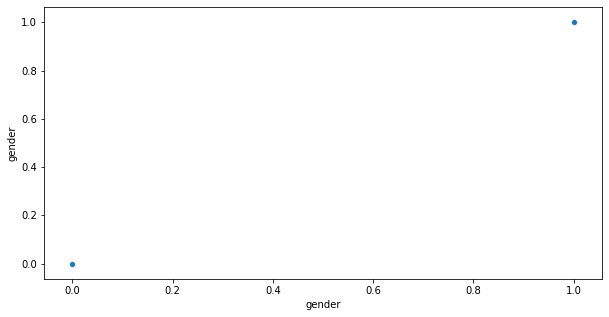

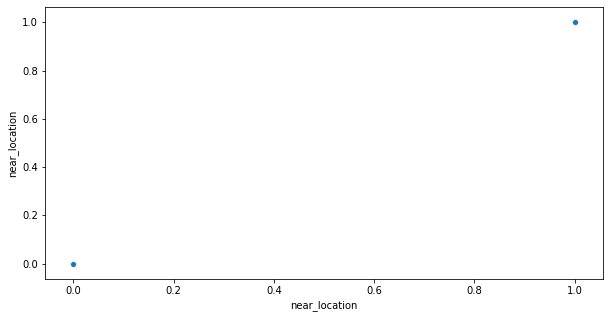

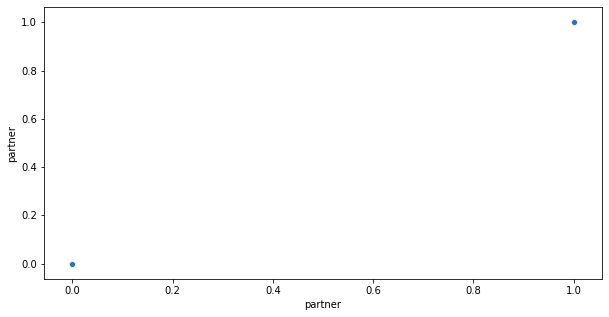

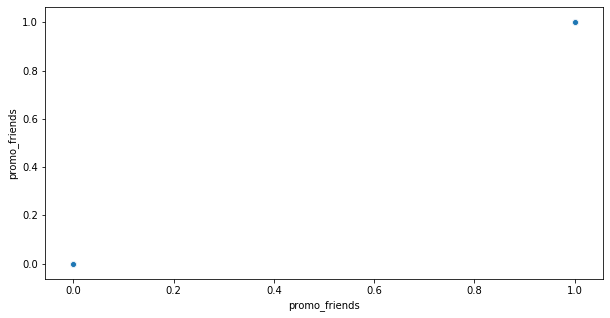

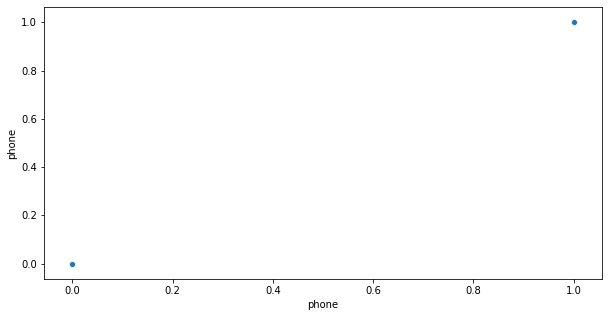

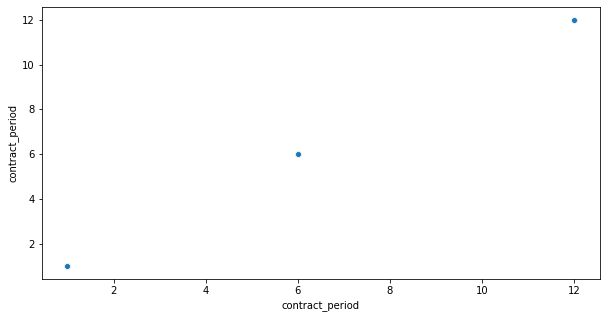

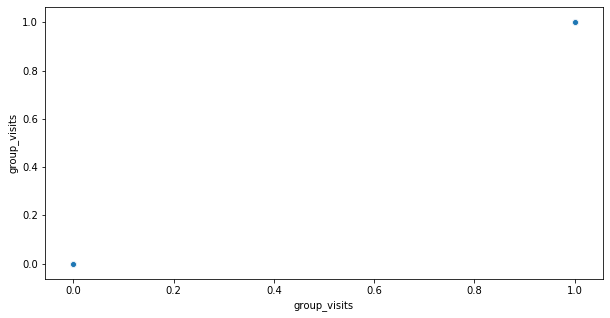

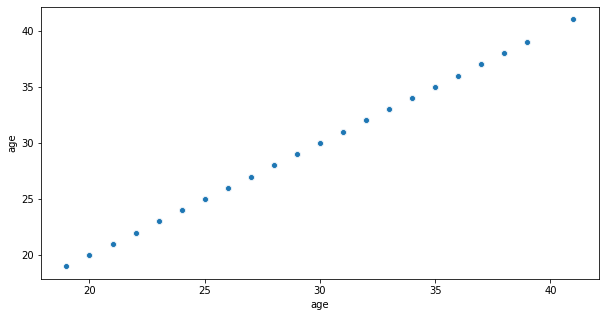

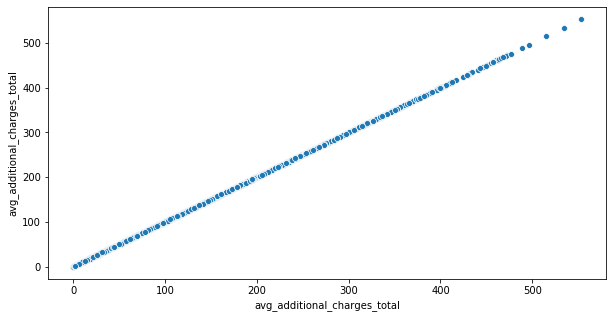

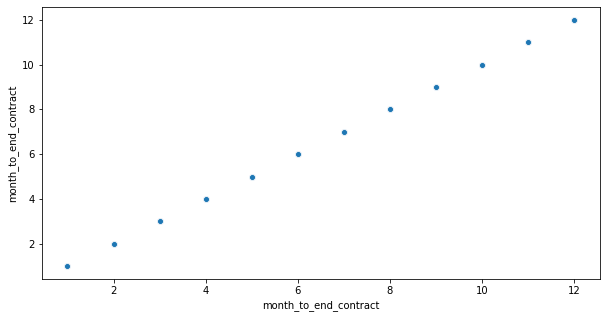

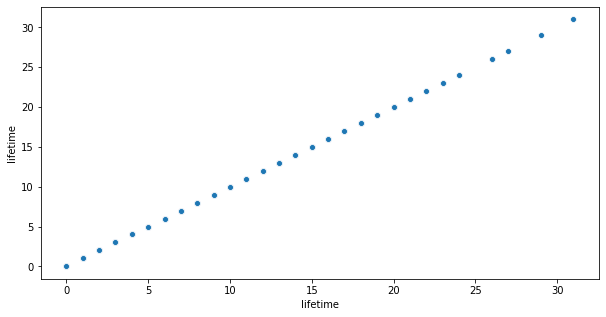

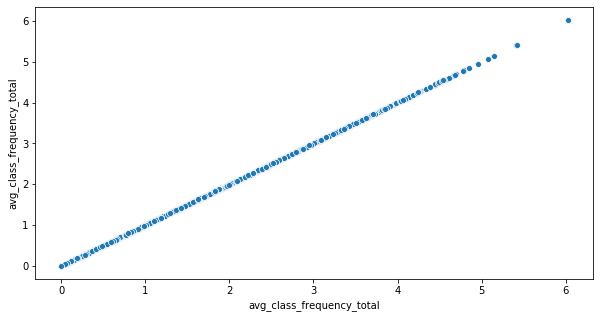

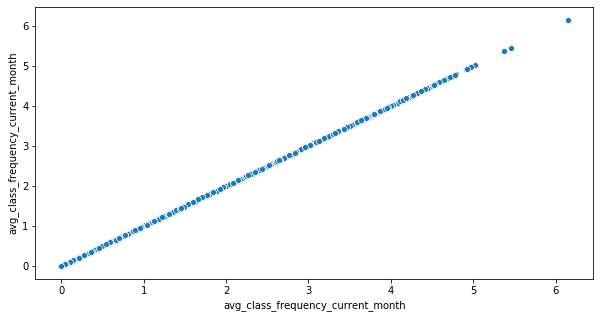

In [7]:
#Построим распредления для тех, кто остался.
for col in df_stay.drop('churn', axis=1).columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(df_stay[col], df_stay[col])

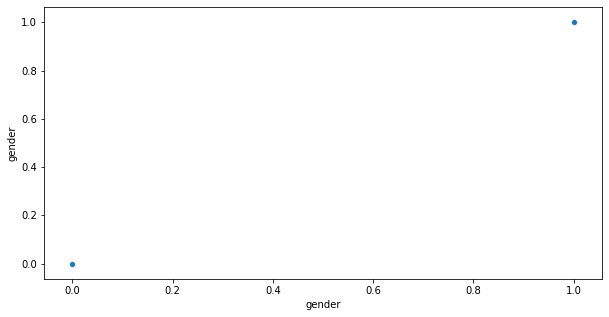

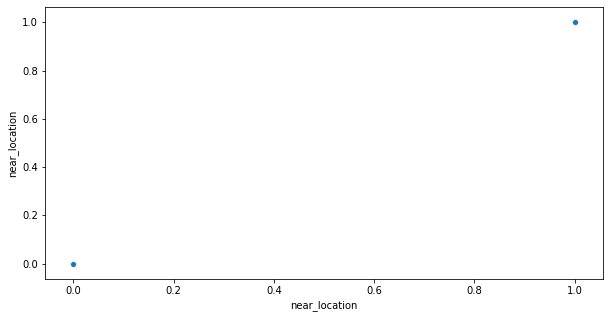

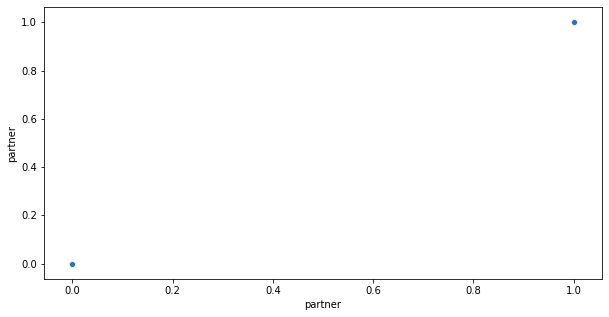

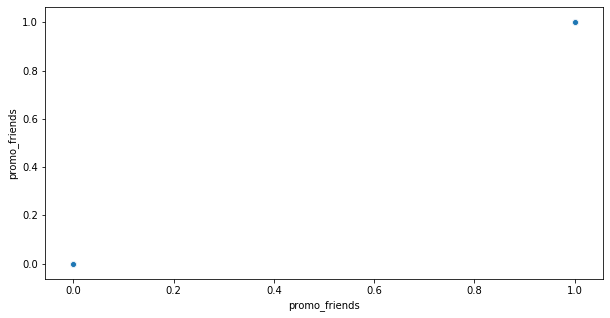

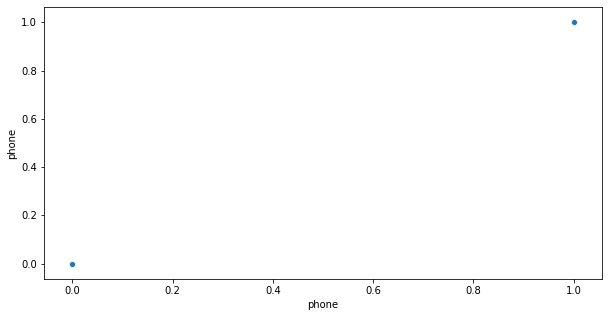

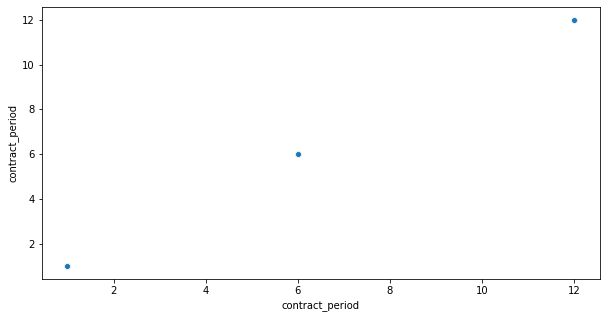

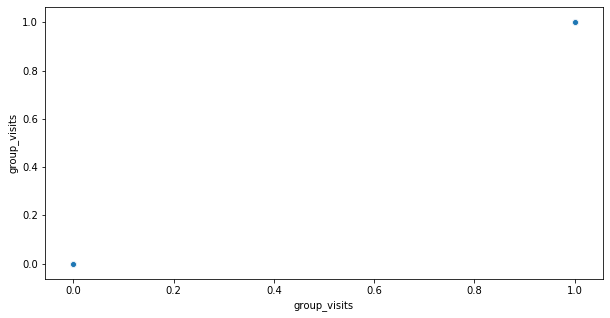

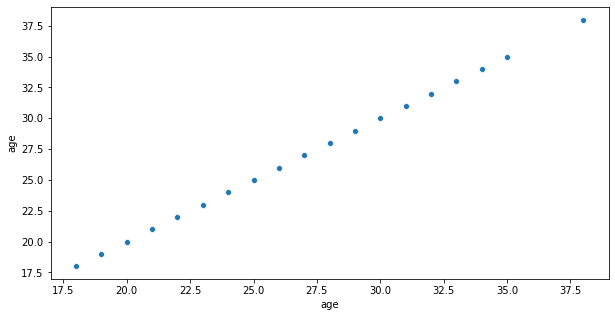

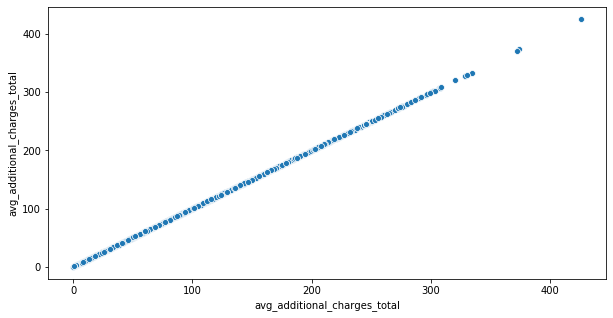

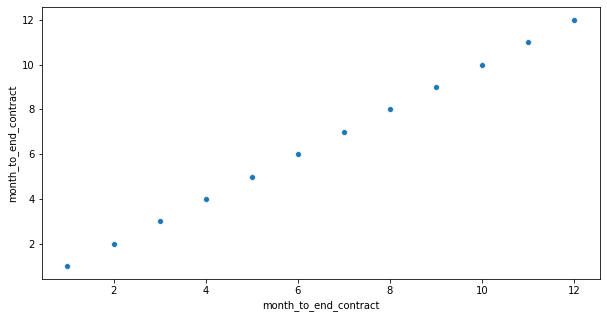

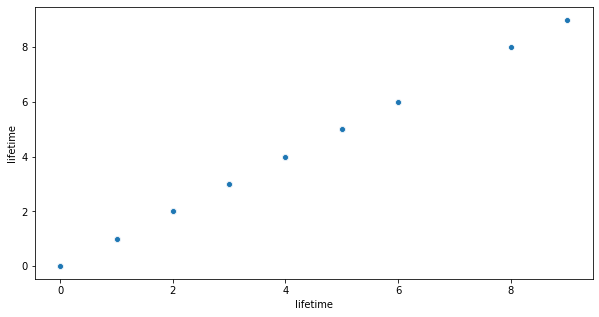

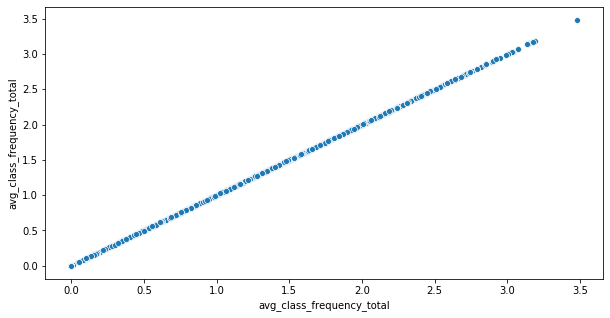

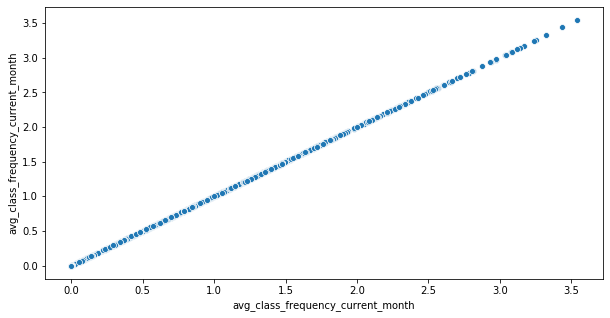

In [8]:
#Построим распредления для тех, кто ушел.
for col in df_out.drop('churn', axis=1).columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(df_out[col], df_out[col])

 В диаграмме рассеяние, выбросов и перекосов не наблюдается. 

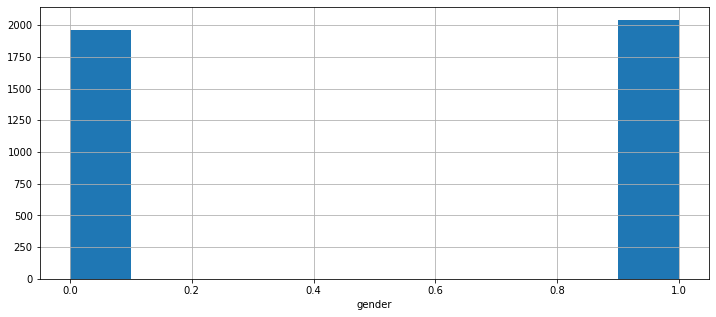

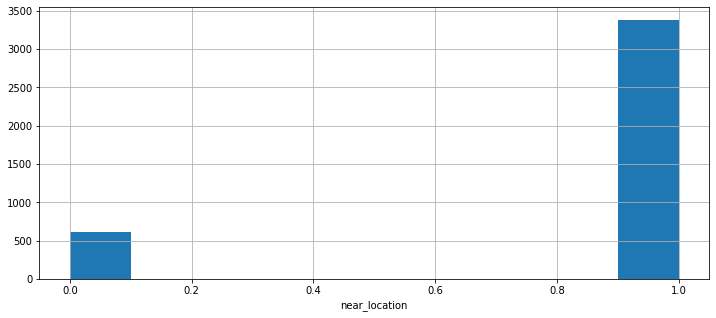

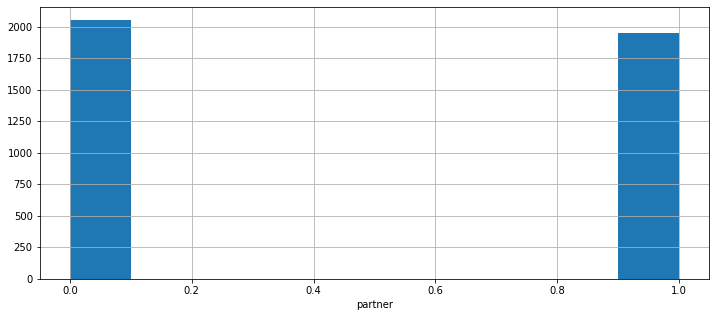

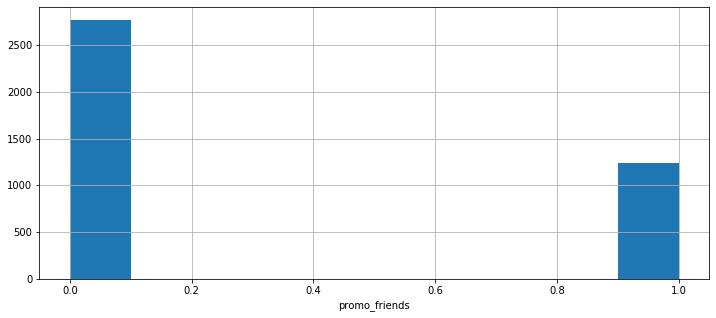

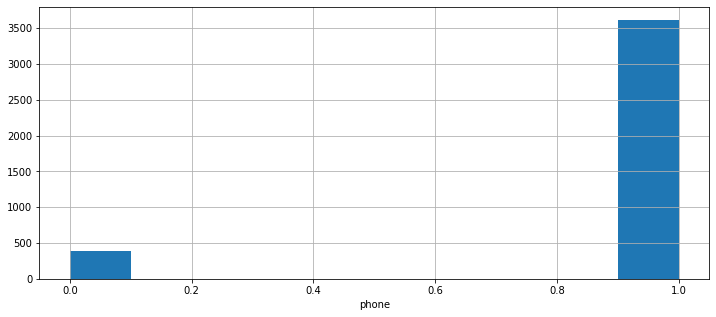

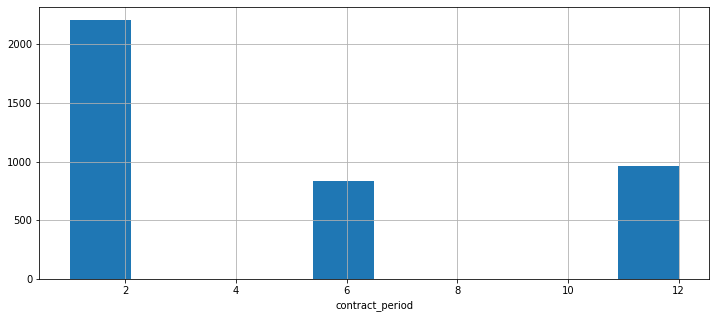

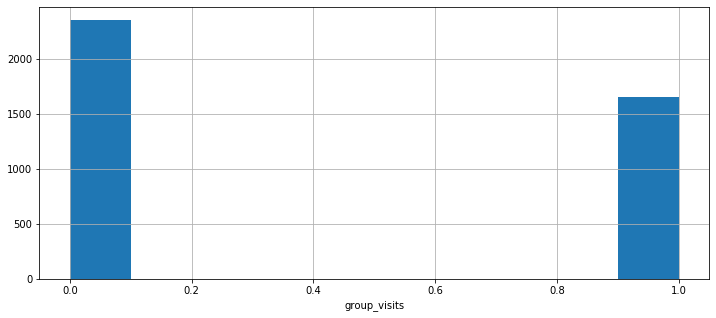

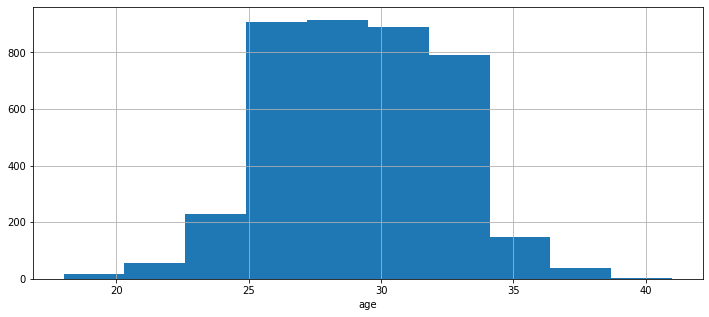

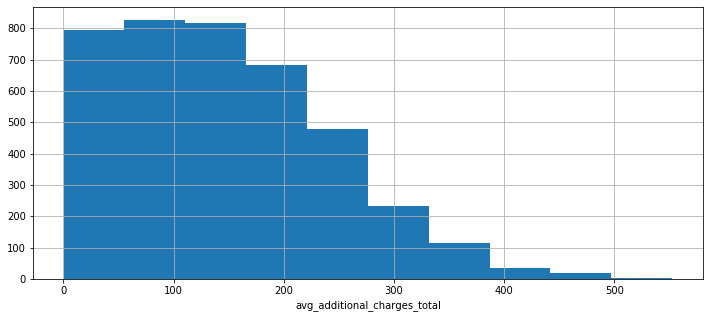

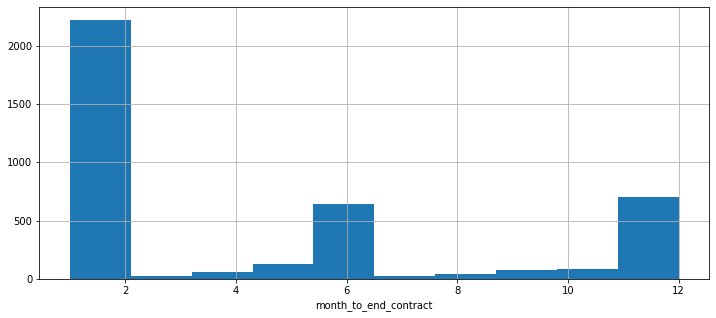

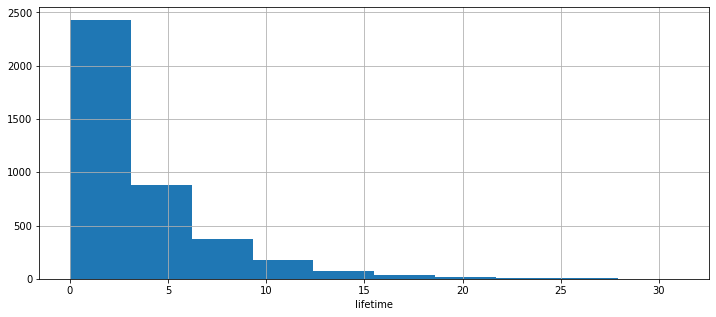

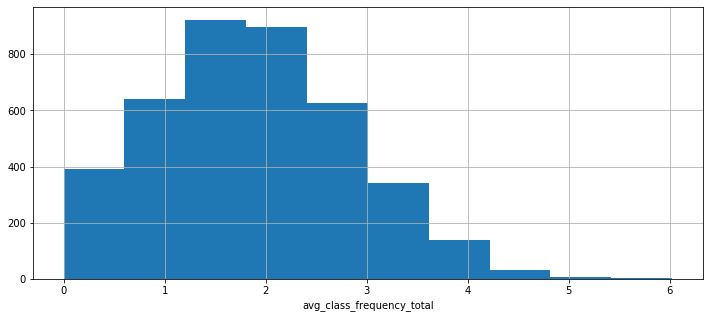

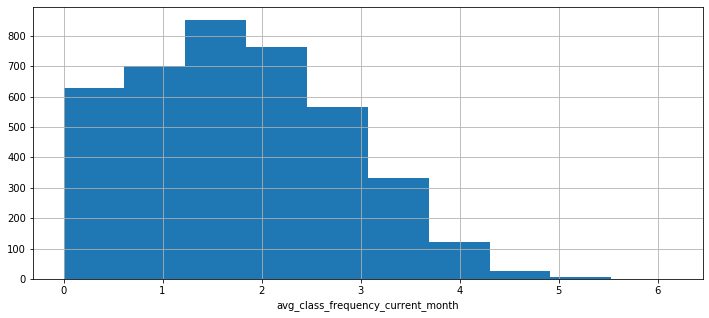

In [9]:
#построим столбчатую гитограмму для тех кто остался
for col in df_stay.drop('churn', axis=1).columns:
    plt.figure(figsize=(12, 5))
    df[col].hist()
    plt.xlabel(col)

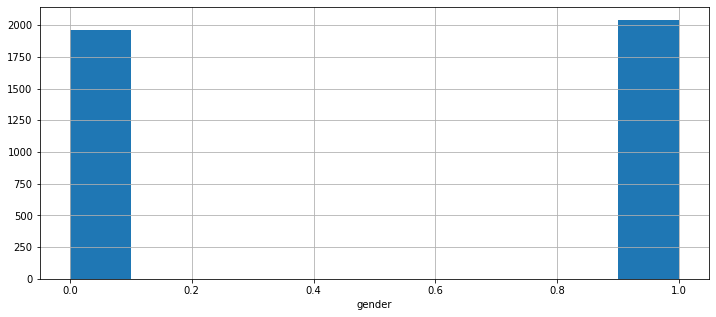

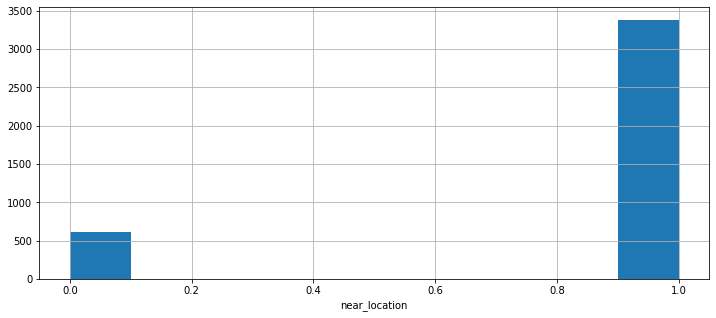

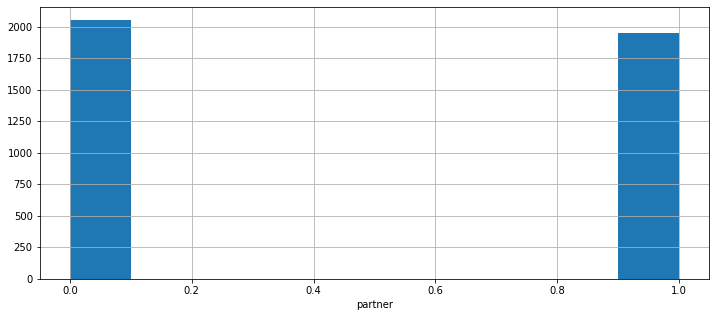

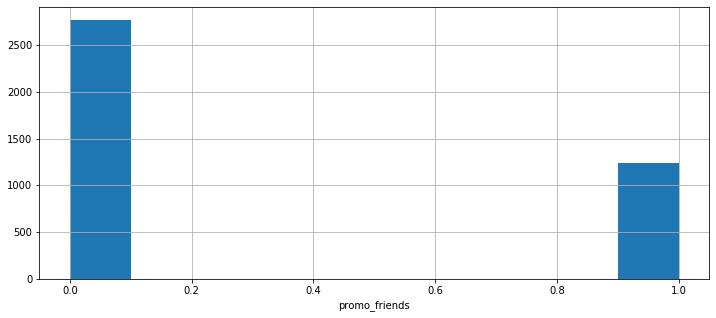

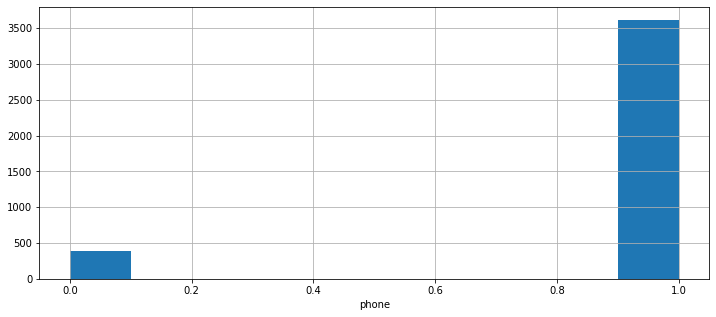

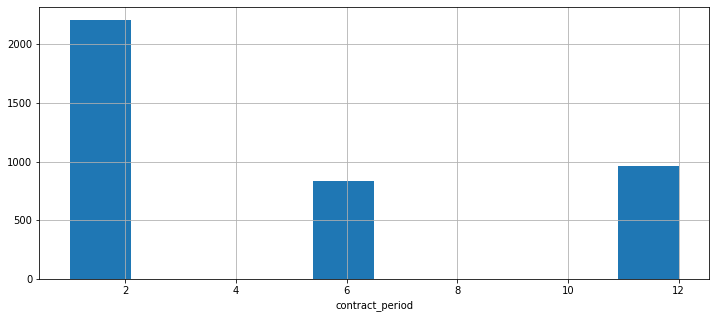

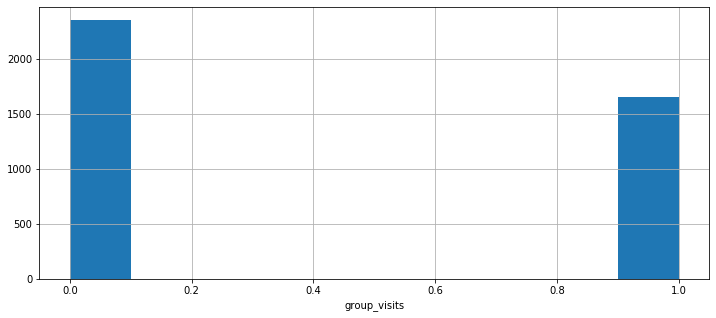

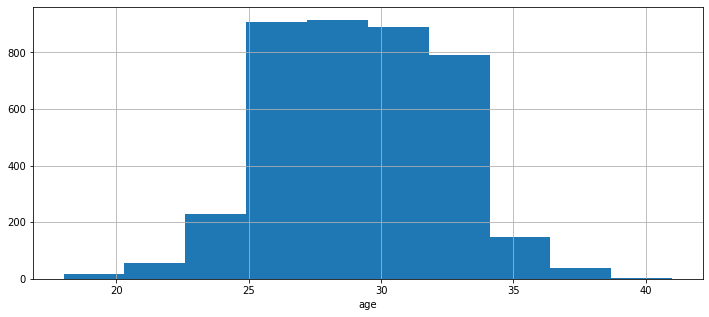

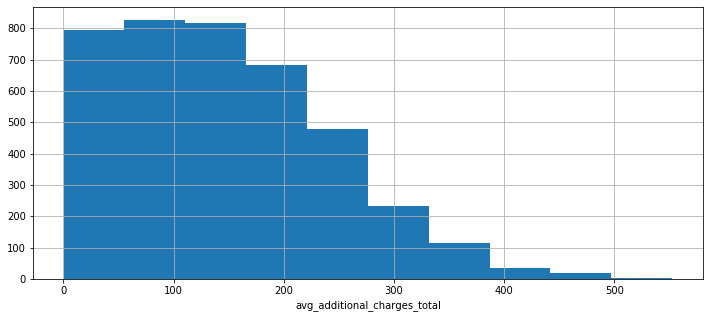

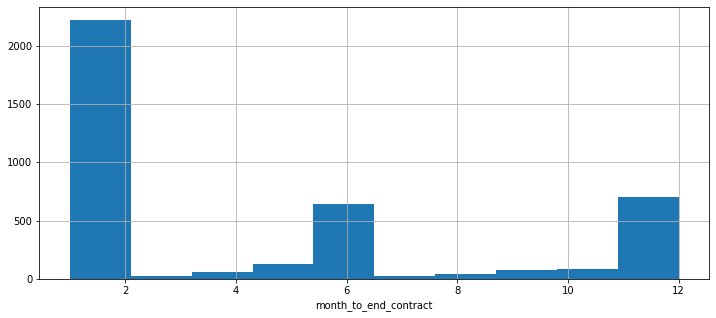

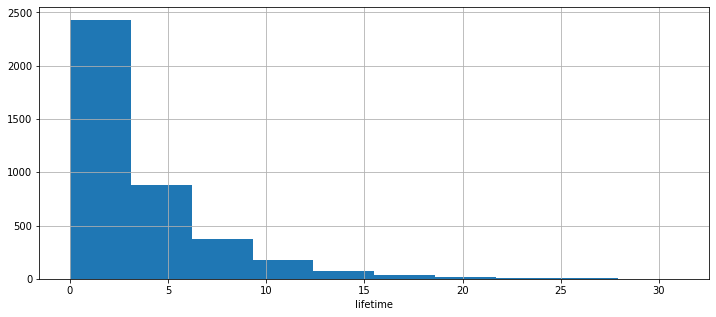

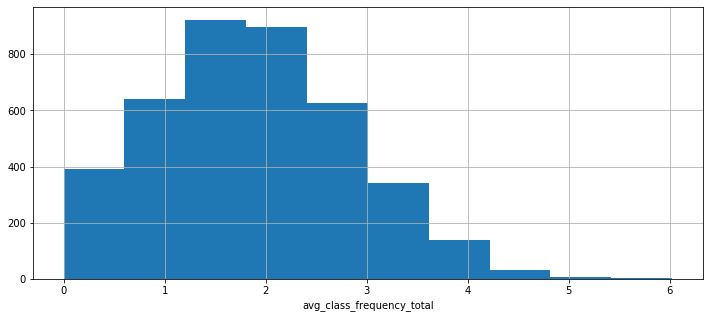

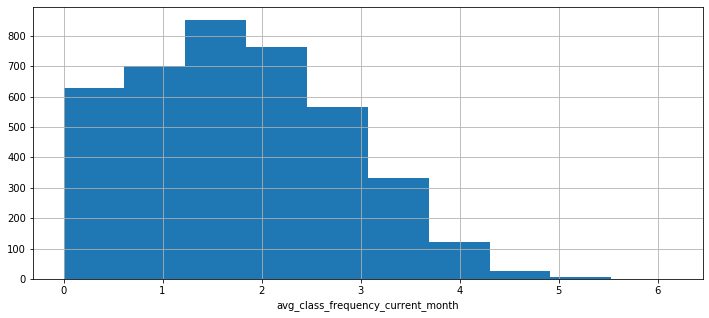

In [10]:
#построим столбчатую гитограмму для тех кто ушел
for col in df_out.drop('churn', axis=1).columns:
    plt.figure(figsize=(12, 5))
    df[col].hist()
    plt.xlabel(col)

На гистограммах так же не обнаружены выбросы или аномальные значения.


Сравним гистограммы тех кто ушел и тех кто остался:
    
gender - раделились практически оинаково, одного пола немного больше другого.
    
near_loction - практически одинаковы один класс преобладает над други. Можно предположить, что этот клас тех ктоживет или 
работает рядом с фитнес центром.
    
parther - графики у обоих класов одинаковы и один немного выше другого.
    
promo_friends - у тех кто ушел и кто остался графики очень похожи, один столбец выше другого. (если уточнить чему соответствует 0 или 1 то моно будет понять работает акция приведи друга или нет).
    
phone - У большенства клиентов указан номер телефона, но есть клиенты у которых номер телефона не указан. С этим стоит разобраться.
    
contract_periud - большенство клиентов берет абонемент на 3 месяца, 
    
group_visits - графики одинаковы, если уточнить чему соответствует 0 или 1 то моно будет понять на сколько групповые заняти интересны клиентам.
    
age - судя по гистограмма возвраст клиентов от 25-35 лет.
    
аvg_class_frequency_total - выручка практически одинакова между теми кто остался и ушел.
    
month_to_end_contract - У большиства клиентов у обоих классов до конца абонемента осталось около 2 месяцев.
    
lifetime - в среднем клиенты "живут" 5 месяцев.
    
аvg_class_frequency_total, аvg_additional_charges_total - у обоих групп клиенты посещаю в неделю от 1 до 3 занятий
    

### Постройте матрицу корреляций и отобразите её.

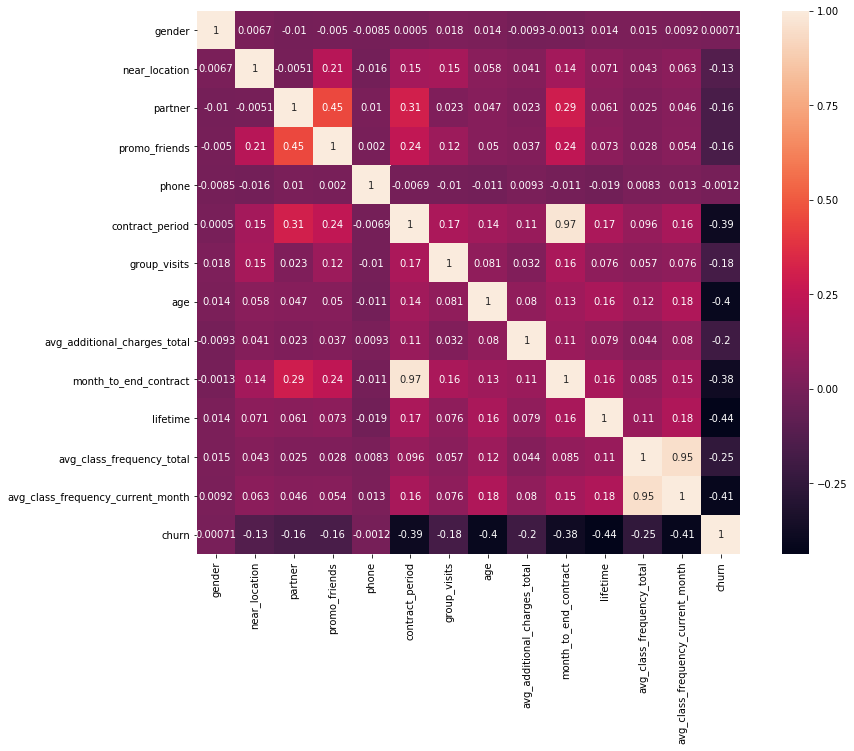

In [11]:
# посчитаем корреляцию таблицы
df_corr = df.corr()

# Построим тепловую карату и посмотерм как коррелирую данные между собой.
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, square=True)
plt.show()


In [12]:
# Удалим сильно корилирующие столбцы
df = df.drop('month_to_end_contract', axis = 1)
df = df.drop('avg_class_frequency_current_month', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
gender                          4000 non-null int64
near_location                   4000 non-null int64
partner                         4000 non-null int64
promo_friends                   4000 non-null int64
phone                           4000 non-null int64
contract_period                 4000 non-null int64
group_visits                    4000 non-null int64
age                             4000 non-null int64
avg_additional_charges_total    4000 non-null float64
lifetime                        4000 non-null int64
avg_class_frequency_total       4000 non-null float64
churn                           4000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 375.1 KB


Целевая переменная слабо коллериут 'chunr' с другмим признаками. Судя из графика вообще все значения в таблице между собой слабо коллерируют. Только сильная корелляция наблюдается между 'Contract_period'и 'Month_to_end_contract' и 'Avg_class_frequency_current_month' и 'Avg_class_frequency_total', что логично.

## Вывод
При изучении данных аномалий и выбросов не обнаружено. Данные между собой коррелирую между собой слабо. Сильная корреляция наблюдается между 'Contract_period'и 'Month_to_end_contract' и 'Avg_class_frequency_current_month' и 'Avg_class_frequency_total', что логично. Единственное замечание, это то что те кто попал в отток пользуются другими услугами фитнес центра.

# Шаг 3. Постройте модель прогнозирования оттока клиентов

In [13]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [14]:
# Обучим модель для логической регресии
# Задаим модель
model_log = LogisticRegression(random_state=0)

#обучим модель
model_log.fit(X_train_st, y_train)

#сделаем прогнозы на основе модели
predictions_log = model_log.predict(X_test_st)
probabilities = model_log.predict_proba(X_test_st)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
#Обучим модель случайным лесом
#Зададим модель
model_rf = RandomForestClassifier(n_estimators = 100, random_state=0)

#обучим модель
model_rf.fit(X_train_st, y_train)

#сделаем прогнозы на основе модели
predictions_rf = model_rf.predict(X_test_st) # Ваш код здесь

In [16]:
#для удобства вывода метрик сосздадим функцию
def metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [17]:
#Выведим метрики accuracy, precision и recall для сравнения
metrics(y_test, predictions_log, title='Метрики для модели логистической регрессии')
print()
print('--------------------------------------------')
print()
metrics(y_test, predictions_rf, title='Метрики для модели случайный лес')

Метрики для модели логистической регрессии
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81

--------------------------------------------

Метрики для модели случайный лес
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.76


## Вывод
После сравнения двух моделей логической регрессии и случайного леса, видно что метрики accuracy, precision и recall у логической регрессии. Следовательно, лучшая модель это - логическая регрессия

# Шаг 4. Сделайте кластеризацию клиентов
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

In [18]:
df_no_churn = df.drop('churn', axis = 1)

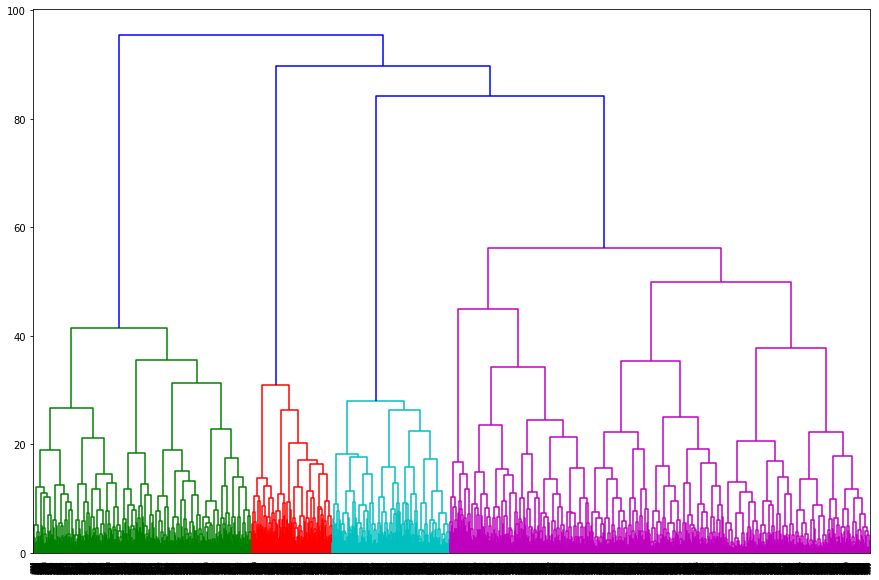

In [19]:
# Стандартизируем данные
df_no_churn = scaler.fit_transform(df_no_churn)

#Построим матрицу расстояний функцией 
linked = linkage(df_no_churn, method = 'ward')

#построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

### На основании полученного графика можно выделить 6 крупных кластеров.

## Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.

In [20]:
# задаём модель k_means
km = KMeans(n_clusters = 5, random_state=0)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(df_no_churn)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

## Посмотрите на средние значения признаков для кластеров. 

In [21]:
df_cluster = df.groupby('cluster_km').mean()
display(df_cluster)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


'churn' - У 0, 2, 3 и 4 кластеры склонны к оттоку, по сравнению с 1. 

'avg_additional_charges_total' - Самая большая выручка у 1 кластера.

'age' - средний возраст клиентов посещающих фитнес центр от 28 до 29 лет.

'phone' - У 0  кластера в данном столбце нули. Телефоны клиентов не указаны.

'promo_friends' - 1 кластер более чем на 80% состоит из клиентов с промо акции.

'near_location' - В кластерах с 1 по 4 наблюдается, что клуб посещают люди, которые рядом живут или работают. В 0 кластере таких клиентов нет.

'gender' -  клиентов мужчин и женщин практически одинаково.


### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

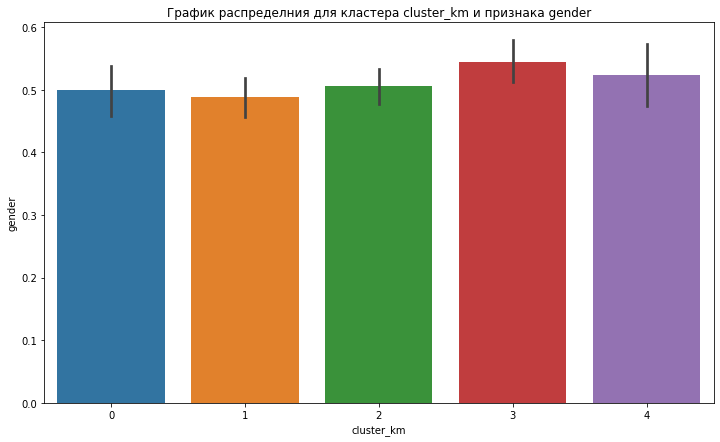

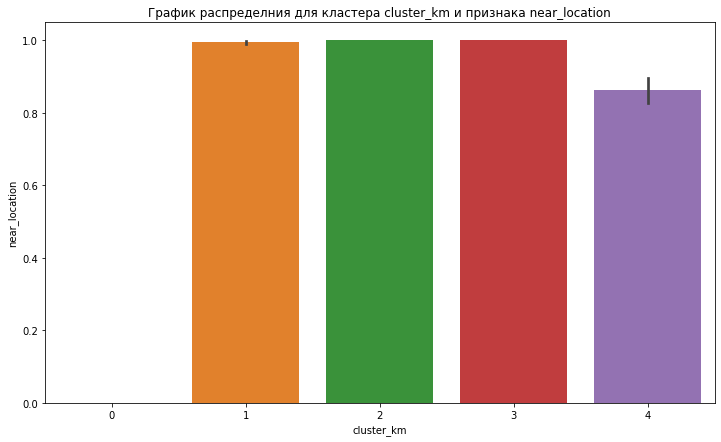

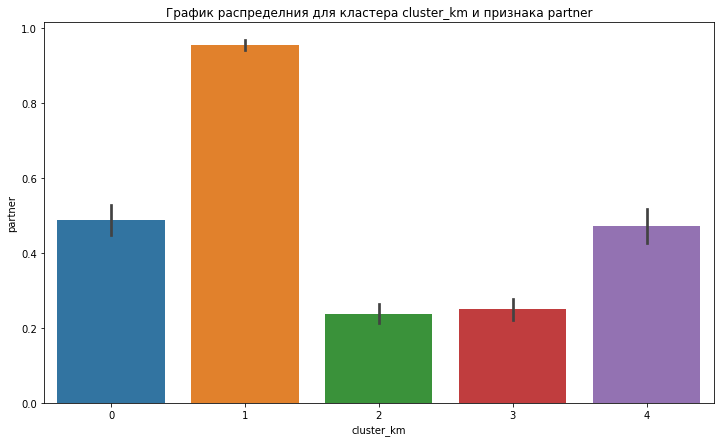

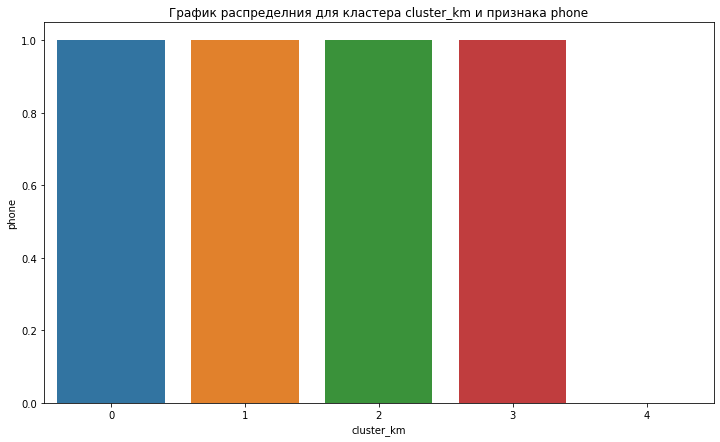

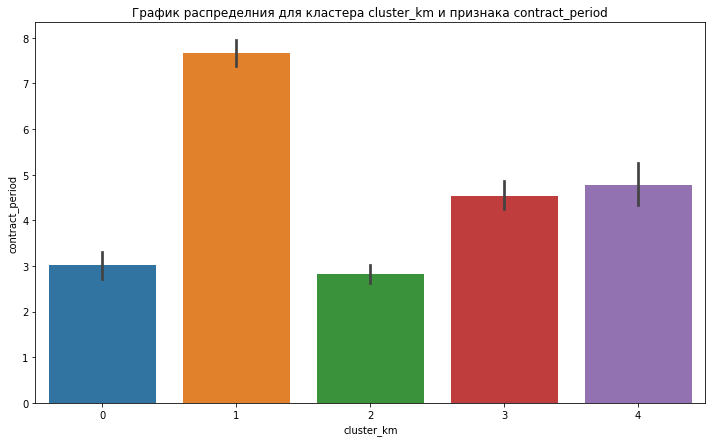

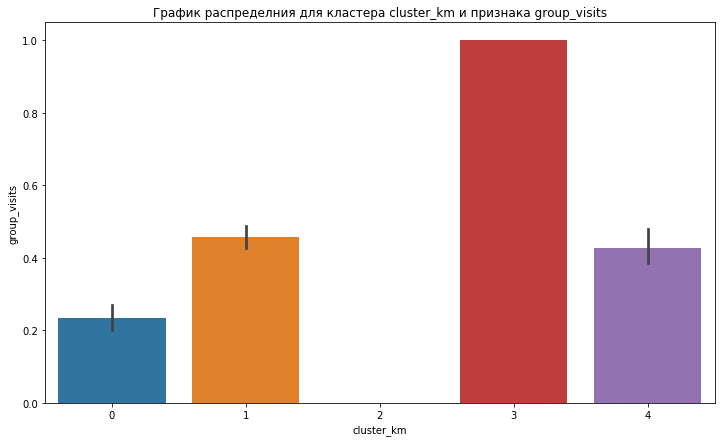

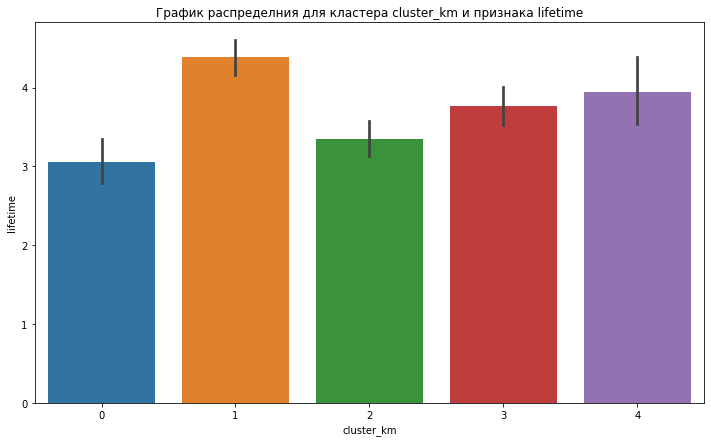

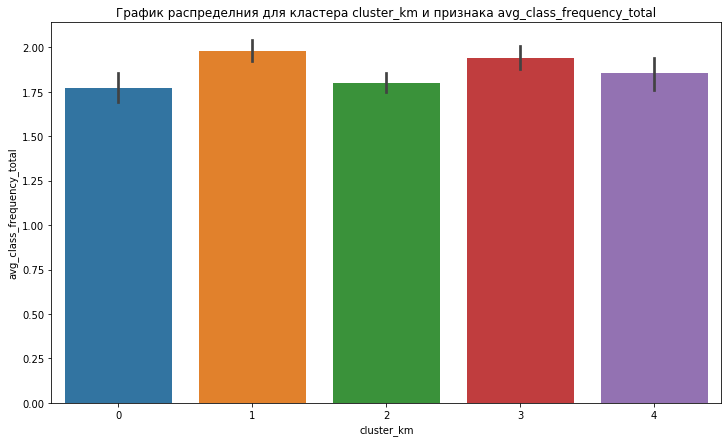

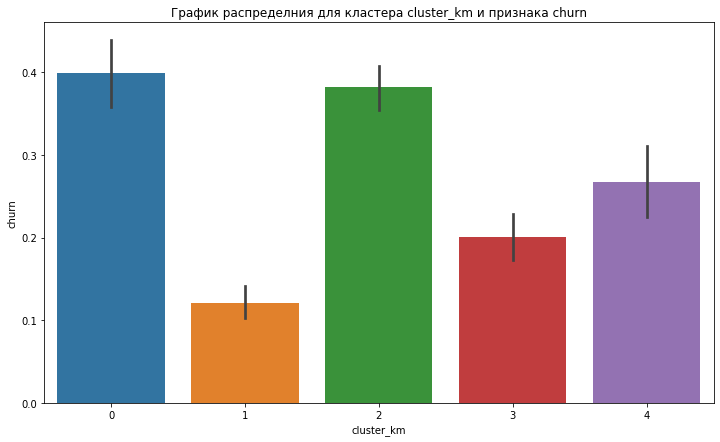

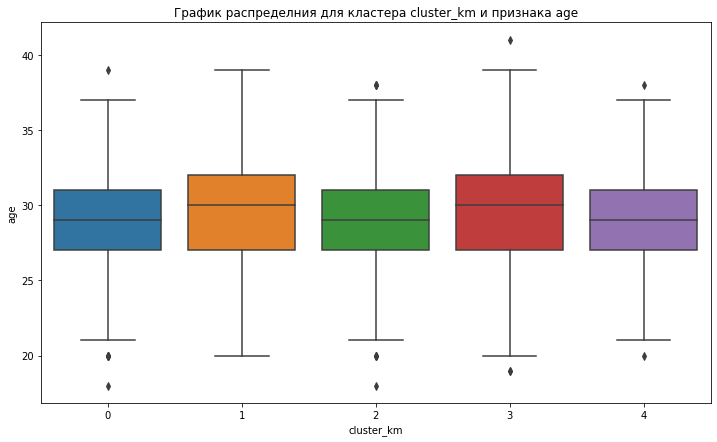

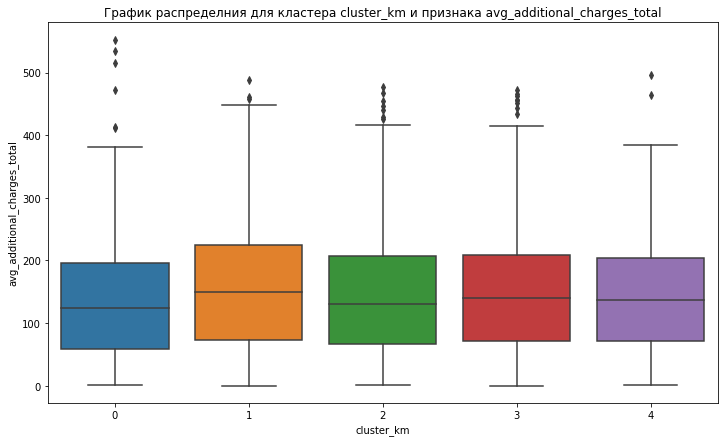

In [22]:
#построим графики  признаков для кластеров
for column in df[['gender', 'near_location', 'partner', 'phone', 'contract_period', 'group_visits', 'lifetime', 
                  'avg_class_frequency_total', 'churn']]:
    plt.figure(figsize = (12,7))
    sns.barplot(x='cluster_km', y=column, data=df)
    plt.title('График распределния для кластера {} и признака {}'. format('cluster_km', column))


for column in df[['age', 'avg_additional_charges_total']]:
    plt.figure(figsize = (12,7))
    sns.boxplot(x='cluster_km', y=column, data=df)
    plt.title('График распределния для кластера {} и признака {}'. format('cluster_km', column))

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [23]:
df_dol = df.groupby(['cluster_km'])['churn'].mean()
print(df_dol)

cluster_km
0    0.399287
1    0.120952
2    0.381625
3    0.200918
4    0.266839
Name: churn, dtype: float64


Склонны к оттоку, клиенты из кластеров 0, 2, 3 и 4. 

# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

 Комментарий студента 
Проведён анализ клиентов, обнаружены возможные причины оттока и спрогнозирован отток. После анализа появились следующие рекомендации.
    
Рекомендации по работе с клиентами
1. Разобраться, почему у некоторых клиентов отсутствует номер телефона, постараться уменьшить такое кол-во клиентов

2. Собрать обратную связь от клиентов из кластеров 0, 2, 3 и 4. 
    
3. Начать работу по привлечение клиентов из других районов, чтобы не был большой перекос на "местных" клиентов.
    
4. Собрать обратную связь у клиентов, почему они ходят или не ходя на групповые занятия.
    
5. Проработать программы или акции для увеличения lifetime, а так же по продажам абонементов на 12 месяцев.
